In [1]:
import networkx as nx
import pandas as pd

# Definitions


In [2]:
definitions = pd.read_json('../data/definitions.json', typ='split')
using_nodes = ["Gene","Compound","Disease"]

#metanodes -"Gene","Compound","Disease"
for node in using_nodes:
    print(f'{node} : {definitions["metanodes"].get(node)}')

Gene : Protein-coding human genes. From Entrez Gene.
Compound : Approved small molecule compounds with documented chemical structures. From DrugBank.
Disease : Complex diseases, selected to be distinct and specific enough to be clinically relevant yet general enough to be well annotated. From Disease Ontology.


In [3]:
not_using_nodes = [node for node in definitions["metanodes"].keys() if node not in using_nodes]

In [4]:
using_edges = []

for edge in definitions["metaedges"].keys():
    e = edge.split('–')
    if (e[0] not in not_using_nodes) and (e[-1] not in not_using_nodes):
        using_edges.append(edge.replace('–',' - '))
        print(f'{edge} : {definitions["metaedges"].get(edge)}','\n')

Compound–binds–Gene : The Compound physically binds to the Gene's protein product according to BindingDB, DrugBank, or DrugCentral 

Compound–downregulates–Gene : The Gene is under-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Compound–palliates–Disease : The Compound is a symptomatic indication for the Disease (i.e. the Compound treats a significant symptom of the Disease) according to PharmacotherapyDB 

Compound–resembles–Compound : The Compounds are chemical similar to each other: Their extended connectivity fingerprints have a Dice coefficient ≥ 0.5. 

Compound–treats–Disease : The Compound is a disease-modifying indication for the Disease (i.e. the Compound therapeutically changes the underlying or downstream biology of the Disease) according to PharmacotherapyDB 

Compound–upregulates–Gene : The Gene is over-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Disease–associates–Ge

# nodes


In [5]:
metanodes = pd.read_csv('../data/metanodes.tsv', sep='\t')
metanodes.query('metanode in @using_nodes')

,metanode,abbreviation,metaedges,nodes,unconnected_nodes
3,Compound,C,8,1552,14
4,Disease,D,8,137,1
5,Gene,G,16,20945,1800


In [6]:
nodes = pd.read_csv('../data/hetionet-v1.0-nodes.tsv', sep='\t')

In [7]:
nodes.query('kind in @using_nodes', inplace=True)

# nodes['id'] = nodes['id'].str.split('::').str[-1]

In [8]:
nodes

#### id is the node identifier prepended with the node type plus :: as a separator. 
#### name is the node name. 
#### kind is the node type.

,id,name,kind
13174,Compound::DB00014,Goserelin,Compound
13175,Compound::DB00035,Desmopressin,Compound
13176,Compound::DB00050,Cetrorelix,Compound
13177,Compound::DB00091,Cyclosporine,Compound
13178,Compound::DB00093,Felypressin,Compound
...,...,...,...
35803,Gene::9991,PTBP3,Gene
35804,Gene::9992,KCNE2,Gene
35805,Gene::9993,DGCR2,Gene
35806,Gene::9994,CASP8AP2,Gene


In [9]:
compound = nodes[nodes['id'].str.contains('Compound')]['id'].to_list()
gene = nodes[nodes['id'].str.contains('Gene')]['id'].to_list()
disease = nodes[nodes['id'].str.contains('Disease')]['id'].to_list()

# edges

In [10]:
metaedges = pd.read_csv('../data/metaedges.tsv', sep='\t')
metaedges.query('metaedge in @using_edges | metaedge == "Gene > regulates > Gene"',inplace=True)
metaedges

,metaedge,abbreviation,edges,source_nodes,target_nodes,unbiased
3,Compound - binds - Gene,CbG,11571,1389,1689,0
5,Compound - downregulates - Gene,CdG,21102,734,2880,21102
6,Compound - palliates - Disease,CpD,390,221,50,0
7,Compound - resembles - Compound,CrC,6486,1042,1054,6486
8,Compound - treats - Disease,CtD,755,387,77,0
9,Compound - upregulates - Gene,CuG,18756,703,3247,18756
10,Disease - associates - Gene,DaG,12623,134,5392,1284
11,Disease - downregulates - Gene,DdG,7623,44,5745,7623
14,Disease - resembles - Disease,DrD,543,112,106,0
15,Disease - upregulates - Gene,DuG,7731,44,5630,7731


In [11]:
edge_file = '../data/edges.sif'
edges = pd.read_csv(edge_file, sep='\t',)

In [12]:
edges = pd.merge(metaedges[['metaedge','abbreviation']], edges, left_on='abbreviation', right_on='metaedge')
edges.drop('metaedge_y', axis=1, inplace=True)
edges

,metaedge_x,abbreviation,source,target
0,Compound - binds - Gene,CbG,Compound::DB00514,Gene::1136
1,Compound - binds - Gene,CbG,Compound::DB00686,Gene::2246
2,Compound - binds - Gene,CbG,Compound::DB00786,Gene::4317
3,Compound - binds - Gene,CbG,Compound::DB01209,Gene::4988
4,Compound - binds - Gene,CbG,Compound::DB01588,Gene::2560
...,...,...,...,...
562101,Gene > regulates > Gene,Gr>G,Gene::5184,Gene::8659
562102,Gene > regulates > Gene,Gr>G,Gene::22818,Gene::5613
562103,Gene > regulates > Gene,Gr>G,Gene::29888,Gene::5467
562104,Gene > regulates > Gene,Gr>G,Gene::5894,Gene::595


# label

In [13]:
connected_compound_disease = edges[(edges['source'].str.contains('Compound')) & (edges['target'].str.contains('Disease'))]
connected_compound_disease

,metaedge_x,abbreviation,source,target
32673,Compound - palliates - Disease,CpD,Compound::DB01175,Disease::DOID:3312
32674,Compound - palliates - Disease,CpD,Compound::DB00321,Disease::DOID:7148
32675,Compound - palliates - Disease,CpD,Compound::DB00176,Disease::DOID:594
32676,Compound - palliates - Disease,CpD,Compound::DB01037,Disease::DOID:10652
32677,Compound - palliates - Disease,CpD,Compound::DB00945,Disease::DOID:9074
...,...,...,...,...
40299,Compound - treats - Disease,CtD,Compound::DB00860,Disease::DOID:8893
40300,Compound - treats - Disease,CtD,Compound::DB01265,Disease::DOID:2043
40301,Compound - treats - Disease,CtD,Compound::DB01030,Disease::DOID:1324
40302,Compound - treats - Disease,CtD,Compound::DB01101,Disease::DOID:5041


In [14]:
connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)
connected_compound_disease = connected_compound_disease.assign(label = 1)
connected_compound_disease

/var/folders/h7/80308m4j7kg6zp9y8km0_ydm0000gn/T/ipykernel_6341/2249382706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)


,source,target,label
32673,Compound::DB01175,Disease::DOID:3312,1
32674,Compound::DB00321,Disease::DOID:7148,1
32675,Compound::DB00176,Disease::DOID:594,1
32676,Compound::DB01037,Disease::DOID:10652,1
32677,Compound::DB00945,Disease::DOID:9074,1
...,...,...,...
40299,Compound::DB00860,Disease::DOID:8893,1
40300,Compound::DB01265,Disease::DOID:2043,1
40301,Compound::DB01030,Disease::DOID:1324,1
40302,Compound::DB01101,Disease::DOID:5041,1


In [15]:
connected_compound_disease_list = list(zip(connected_compound_disease['source'],connected_compound_disease['target']))

# 그래프 생성

In [16]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(compound,group='compound', weight=1)
G.add_nodes_from(gene,group='gene', weight=0.1)
G.add_nodes_from(disease,group='disease', weight=10)

In [17]:
# 엣지 추가 및 가중치 부여
for _, edge in edges.iterrows():
    source = edge['source']
    target = edge['target']
    weight = 2 if G.nodes[source]['group'] == 'compound' and G.nodes[target]['group'] == 'disease' else 0.1
    G.add_edge(source, target, weight=weight)

KeyboardInterrupt: 

In [ ]:
print(G['Compound::DB00514']['Gene::1136'])

{'weight': 0.1}


In [ ]:
print(G['Compound::DB01175']['Disease::DOID:3312'])

{'weight': 2}


# Node2Vec

In [ ]:
from node2vec import Node2Vec

# Node2Vec 모델 생성 및 학습
node2vec = Node2Vec(G, dimensions=60, walk_length=30, num_walks=200, workers=4, p=1.0, q=0.0001)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/22634 [00:00<?, ?it/s]

C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# 노드 임베딩 확인
embedding = model.wv[compound[0]]
print(f'Embedding for Node:, {compound[0]}, \n {embedding}')

Embedding for Node:, Compound::DB00014, 
 [-8.21075514e-02 -9.48655307e-02  4.38469589e-01 -4.71488357e-01
 -2.27997735e-01  1.23261526e-01 -5.06110370e-01  1.10327110e-01
  1.73452064e-01 -5.56085352e-03 -3.02362770e-01 -2.68740028e-01
  3.48644644e-01 -3.64307314e-01 -3.75610054e-01  1.03883848e-01
  2.74055481e-01 -1.17360026e-01  2.51043260e-01 -1.80330798e-01
 -8.36336911e-01 -3.39262396e-01 -6.74567521e-01  2.97883809e-01
  8.68541181e-01 -2.54835844e-01 -6.35016799e-01 -5.49954295e-01
  8.17849860e-02  2.27879614e-01 -3.87821466e-01  5.83167970e-02
 -1.07144944e-01 -1.87796392e-02  3.40858072e-01  2.14912921e-01
 -1.49088934e-01  1.12304620e-01 -4.30021522e-04 -4.86332625e-01
 -1.43108014e-02 -1.75985277e-01 -3.57868761e-01 -1.76601276e-01
  3.96305799e-01 -9.91552100e-02 -4.13969934e-01  2.50114381e-01
 -3.78393114e-01 -5.27587771e-01  3.83395284e-01 -3.85502011e-01
 -4.40203696e-01 -4.60954189e-01 -2.83550262e-01  1.19075529e-01
  1.65070251e-01 -4.16526198e-01  8.83617923e-02

In [ ]:
embedding = model.wv[disease[0]]
print(f'Embedding for Node:, {disease[0]}, \n {embedding}')

Embedding for Node:, Disease::DOID:0050156, 
 [ 0.04604996  0.2678481  -0.2896277  -0.0480328   0.208265   -0.1230171
 -0.53655165  0.46657446  0.14336245 -0.34627706  0.02111875  0.29255533
 -0.23173964 -0.08055535 -0.2586321   0.12551643 -0.19240616 -0.18998379
  0.25897834  0.23105156 -0.22166623 -0.12965932  0.31538734  0.02371432
  0.34990764 -0.5564308  -0.5248242   0.09917939  0.1703251   0.46956056
 -0.16632654  0.02728107 -0.6422925   0.5514876   0.62963355 -0.32332197
 -0.55916643 -0.13321565 -0.16728513  0.04959768  0.14725189  0.62953854
 -0.04131081 -0.12606382 -0.21205439 -0.15692617  0.26252154 -0.47893563
  0.03184799 -0.42693305  0.4230843  -0.3680535  -0.51626194 -0.33430067
  0.01722015 -0.22312854  0.04155286  0.00138413 -0.21068415 -0.1349201 ]


# 데이터

In [ ]:
#cartesian product
df1 = pd.DataFrame({'source':compound})
df2 = pd.DataFrame({'target':disease})

compound_disease = pd.merge(df1.assign(key=1),df2.assign(key=1), on='key').drop('key', axis=1)

#label
compound_disease = pd.merge(compound_disease, connected_compound_disease, how='outer')
compound_disease = compound_disease.fillna(0)
compound_disease

,source,target,label
0,Compound::DB00014,Disease::DOID:0050156,0.0
1,Compound::DB00014,Disease::DOID:0050425,0.0
2,Compound::DB00014,Disease::DOID:0050741,0.0
3,Compound::DB00014,Disease::DOID:0050742,0.0
4,Compound::DB00014,Disease::DOID:0060073,0.0
...,...,...,...
212619,Compound::DB09028,Disease::DOID:9744,0.0
212620,Compound::DB09028,Disease::DOID:9835,0.0
212621,Compound::DB09028,Disease::DOID:986,0.0
212622,Compound::DB09028,Disease::DOID:9917,0.0


In [ ]:
# import numpy as np
# compound_embedding = [np.array(model.wv[com]) for com in compound]
# compound_disease['source'] = compound_disease['source'].replace({'Compound::DB00014',compound_embedding[0]})


In [ ]:
compound_disease_label = []
for com in compound:
    for dis in disease:
        val = []
        val.append(com)
        val.append(dis)
        tup = (com,dis)
        if tup in connected_compound_disease_list:
            val.append(1)
        else:
            val.append(0)
        compound_disease_label.append(val)

In [ ]:
import numpy as np

input = []
for data in compound_disease_label:
    input.append(np.vstack([model.wv[data[0]], model.wv[data[1]]]).reshape(120,))


# Classification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=0)

lr.fit(X_train,y_train)	

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
print(lr.coef_ ,'\n' ,lr.intercept_)

[[-0.61361486 -1.16931922 -0.21840911 -1.77523412 -3.44047755  1.0542624
  -0.45767888  0.13827992  0.46930111  0.55178816 -1.94222066 -0.16322928
  -1.55884183  0.20715234  1.74710696 -0.18377175 -0.47121518 -0.54666052
   1.88357514  0.39605433  0.90763718  1.55727665  0.60152307  0.13825091
   0.75001608 -2.20091362  0.10911063  1.16216005 -0.13498483 -1.46913391
  -1.44758284  1.8838738  -1.73627297  0.56764096 -1.03980967  1.57986526
  -2.31035386  0.92284326  1.92938268 -0.0977551  -0.41330835  1.89579306
   0.96367507 -1.43395984  0.72469017  1.44370651  0.41262205 -0.9040705
   0.79652359  0.01389716  2.12587312 -1.227841    0.05555365  1.40906966
  -0.79650844 -0.39340556 -0.77830529  0.30459693 -1.88425608  0.68726531
   1.36624463  1.04504112  0.70000933  1.43795566 -1.28786679  1.17568757
  -0.72783905 -1.00075096 -1.1056439  -0.71452371 -0.08666692 -1.35980304
  -1.266289   -1.01381907 -0.86260235  0.86479997  1.48402201 -0.73483392
  -0.61274314 -0.23709211 -0.35546661  0

In [ ]:
lr.score(X_test,y_test)
															    

0.8344986517840346

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8344986517840346
Precision: 0.028267898383371824
Recall: 0.8895348837209303
F1 Score: 0.0547945205479452
Confusion Matrix:
[[52925 10519]
 [   38   306]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost 모델 생성 및 학습
xg1 = xgb.XGBClassifier(random_state=0)
xg1.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xg1.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9966608139461968
Precision: 0.8830409356725146
Recall: 0.438953488372093
F1 Score: 0.5864077669902913
Confusion Matrix:
[[63424    20]
 [  193   151]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg2 = xgb.XGBClassifier(random_state=0)
xg2.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg2.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8657741267950084
Precision: 0.03623024830699774
Recall: 0.9331395348837209
F1 Score: 0.0697522816166884
Confusion Matrix:
[[54905  8539]
 [   23   321]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# 오버샘플링 적용
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg3 = xgb.XGBClassifier(random_state=0)
xg3.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg3.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9962532137706152
Precision: 0.6158940397350994
Recall: 0.811046511627907
F1 Score: 0.7001254705144291
Confusion Matrix:
[[63270   174]
 [   65   279]]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve

# XGBoost 모델에서 예측된 확률 값
y_proba = xg3.predict_proba(X_test)[:, 1]

# Precision-Recall 곡선 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# F1 스코어 계산
f1_scores = 2 * (precision * recall) / (precision + recall)

# 가장 높은 F1 스코어와 해당하는 임계값
best_f1_score = np.max(f1_scores)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"가장 높은 F1 스코어: {best_f1_score:.4f} (임계값: {best_threshold:.4f})")


가장 높은 F1 스코어: 0.7413 (임계값: 0.7634)


In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report

y_proba = xg3.predict_proba(X_test)[:, 1]

# 임계값을 조정
threshold = 0.7634  # 임계값 설정
y_pred_adjusted = (y_proba > threshold).astype(int)

# 조정된 예측
print(classification_report(y_test, y_pred_adjusted))

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63444
         1.0       0.77      0.71      0.74       344

    accuracy                           1.00     63788
   macro avg       0.89      0.86      0.87     63788
weighted avg       1.00      1.00      1.00     63788

Accuracy: 0.9973192449990593
Precision: 0.7728706624605678
Recall: 0.7122093023255814
F1 Score: 0.7413010590015129
Confusion Matrix:
[[63372    72]
 [   99   245]]


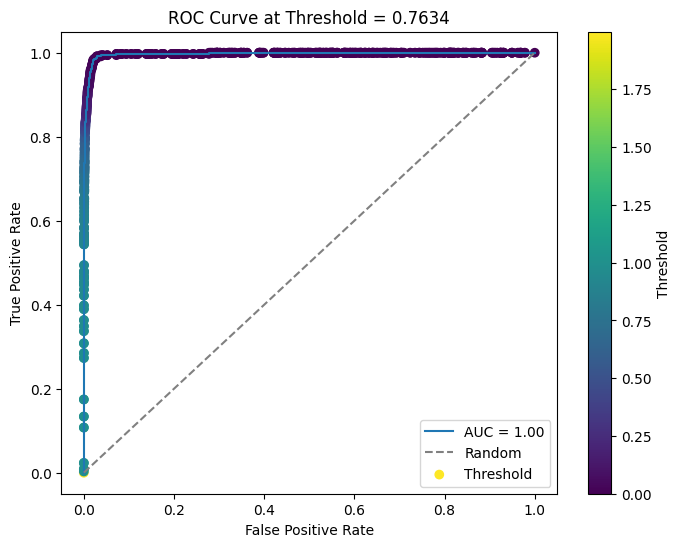

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# XGBoost 모델에서 예측된 확률 점수
y_proba = xg3.predict_proba(X_test)[:, 1]

# 임계값을 0.3으로 설정
threshold = 0.7634
y_pred_adjusted = (y_proba > threshold).astype(int)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC 계산
auc = roc_auc_score(y_test, y_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', label='Threshold', marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve at Threshold = 0.7634')
plt.legend()
plt.colorbar(label='Threshold')
plt.show()

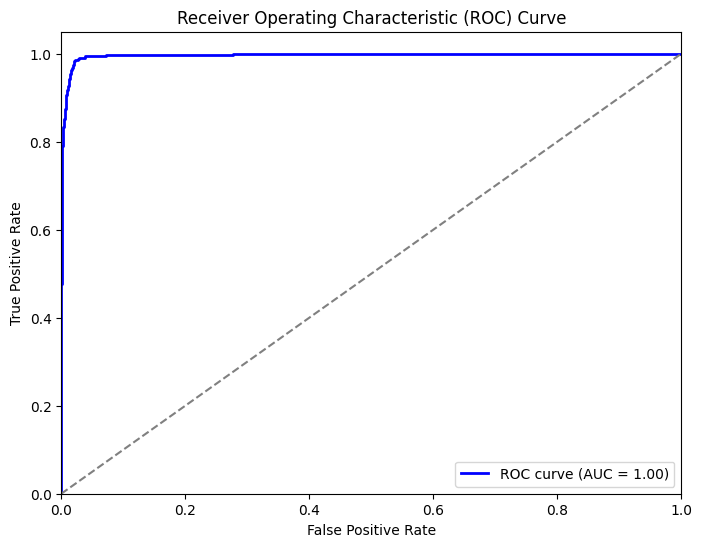

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = xg3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_proba)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 약물재창출

In [ ]:
#Disease::DOID:1612 = breast cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1612': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# XGBoost 모델에서 예측된 확률 값
prediction = xg3.predict_proba(input2)[:, 1]

df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
df['label'] = prediction

# 예측한 결과, 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]

# 정답 label이 1인 conpound 출력
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
rows_list = rows['source'].tolist()

compound_list = []
for i in selected_rows['source']:
    if i not in rows_list:
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_6912\1419689956.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind


In [ ]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities.round(4)

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted

C:\Users\young\AppData\Local\Temp\ipykernel_6912\2087309696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities.round(4)


,source,target,label,label_prob
179254,Compound::DB04845,Disease::DOID:1612,0.999483,0.9995
202270,Compound::DB08871,Disease::DOID:1612,0.999517,0.9995
141168,Compound::DB01185,Disease::DOID:1612,0.999203,0.9992
64037,Compound::DB00603,Disease::DOID:1612,0.998885,0.9989
31979,Compound::DB00351,Disease::DOID:1612,0.998923,0.9989
...,...,...,...,...
141716,Compound::DB01189,Disease::DOID:1612,0.000004,0.0000
47597,Compound::DB00475,Disease::DOID:1612,0.000004,0.0000
142127,Compound::DB01192,Disease::DOID:1612,0.000022,0.0000
142538,Compound::DB01195,Disease::DOID:1612,0.000010,0.0000


In [ ]:
# source 열의 값이 rows_list에 있는 행을 삭제
df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# label_prob 값이 큰 상위 10개의 행 출력
top_10_rows = df_sorted.nlargest(10, 'label_prob')
top_10_rows

,source,target,label,label_prob
87053,Compound::DB00773,Disease::DOID:1612,0.990919,0.9909
82806,Compound::DB00741,Disease::DOID:1612,0.878852,0.8789
190899,Compound::DB06699,Disease::DOID:1612,0.863335,0.8633
55817,Compound::DB00541,Disease::DOID:1612,0.845072,0.8451
68421,Compound::DB00635,Disease::DOID:1612,0.823687,0.8237
102945,Compound::DB00894,Disease::DOID:1612,0.821357,0.8214
150484,Compound::DB01254,Disease::DOID:1612,0.723038,0.7230
142675,Compound::DB01196,Disease::DOID:1612,0.706805,0.7068
112809,Compound::DB00970,Disease::DOID:1612,0.701316,0.7013
170075,Compound::DB01590,Disease::DOID:1612,0.665042,0.6650


In [ ]:
top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
top_10_rows['target'] = 'breast cancer'
top_10_rows

,source,target,label,label_prob
87053,Etoposide,breast cancer,0.990919,0.9909
82806,Hydrocortisone,breast cancer,0.878852,0.8789
190899,Degarelix,breast cancer,0.863335,0.8633
55817,Vincristine,breast cancer,0.845072,0.8451
68421,Prednisone,breast cancer,0.823687,0.8237
102945,Testolactone,breast cancer,0.821357,0.8214
150484,Dasatinib,breast cancer,0.723038,0.7230
142675,Estramustine,breast cancer,0.706805,0.7068
112809,Dactinomycin,breast cancer,0.701316,0.7013
170075,Everolimus,breast cancer,0.665042,0.6650


In [ ]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('xgboost_drug2.csv', index=False)

# -> xg3 모델에 질병이 breast cancer인 input2를 넣었을 때, label이 1이라고 예측되는 결과에 정답 label이 1인 행을 제외하고 label_prob값이 높은 상위 10개를 출력함.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test =\
#     train_test_split(input, compound_disease['label'], test_size=0.3, random_state=42, stratify=compound_disease['label'])

# X_subtrain, X_val, y_subtrain, y_val =\
#     train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# from sklearn.svm import SVC

# svm = SVC(class_weight='balanced', kernel='rbf', probability=True)  # kernel SVM
# svm.fit(X_subtrain, y_subtrain)

SVC(class_weight='balanced', probability=True)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, classification_report

# y_proba = svm.predict_proba(X_test)[:, 1]

# # 임계값을 조정
# threshold = 0.3  # 임계값 설정
# y_pred_adjusted = (y_proba > threshold).astype(int)

# # 조정된 예측
# print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63444
         1.0       0.56      0.61      0.59       344

    accuracy                           1.00     63788
   macro avg       0.78      0.81      0.79     63788
weighted avg       1.00      1.00      1.00     63788



In [ ]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_adjusted)
# print(accuracy)

0.9953125979808114


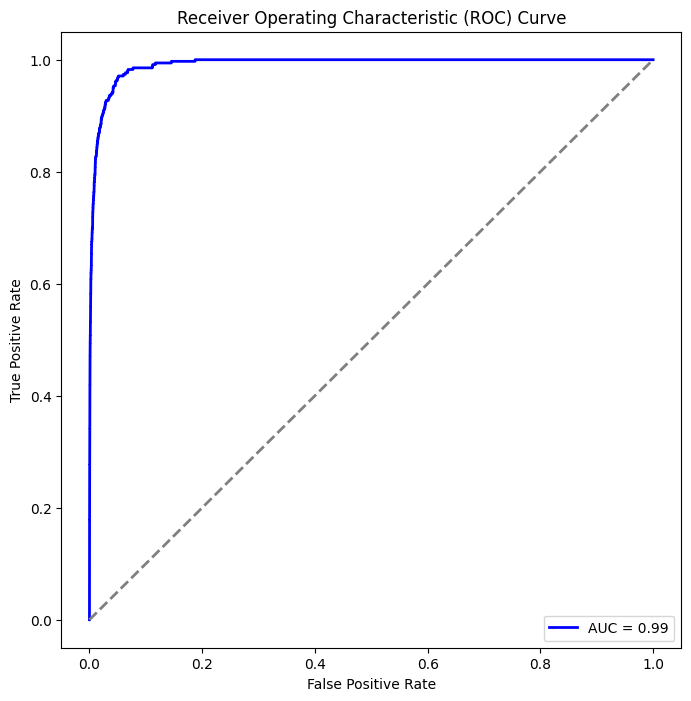

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming you have already imported necessary libraries and executed the previous code

# # Get the predicted probabilities for the positive class
# y_proba = svm.predict_proba(X_test)[:, 1]

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# # Compute the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


In [ ]:
# #Disease::DOID:1612 = breast cancer
# import numpy as np
# input2 = []
# ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
# for data in compound_disease_label:
#     if data[1]=='Disease::DOID:1612': 
#         input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
#         ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# threshold = 0.3        
# prediction = ((svm.predict_proba(input2)[:, 1]) > threshold).astype(int)

# df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
# df['label'] = prediction

# # 예측한 결과, 'label' 열 값이 1인 행 출력
# selected_rows = df[df['label'] == 1]

# # 정답 label이 1인 conpound 출력
# rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
# rows_list = rows['source'].tolist()

# compound_list = []
# for i in selected_rows['source']:
#     if i not in rows_list:
#         compound_list.append(i)

# #에측결과에서 실제결과 값을 제외한 결과
# nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_16080\4116782115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind
13422,Compound::DB00367,Levonorgestrel,Compound
13438,Compound::DB00385,Valrubicin,Compound
13448,Compound::DB00396,Progesterone,Compound
13493,Compound::DB00444,Teniposide,Compound
13545,Compound::DB00499,Flutamide,Compound
13558,Compound::DB00515,Cisplatin,Compound
13581,Compound::DB00541,Vincristine,Compound
13593,Compound::DB00553,Methoxsalen,Compound
13658,Compound::DB00620,Triamcinolone,Compound
13673,Compound::DB00635,Prednisone,Compound


In [ ]:
# # 테스트 세트에 대한 예측 확률 얻기
# y_probabilities = svm.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# # 'label_prob' 열에 예측 확률 추가
# df['label_prob'] = y_probabilities.round(4)

# # label_prob를 기준으로 데이터프레임 정렬
# df_sorted = df.sort_values(by='label_prob', ascending=False)

# df_sorted

C:\Users\young\AppData\Local\Temp\ipykernel_16080\3555384283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities.round(4)


,source,target,label,label_prob
149662,Compound::DB01248,Disease::DOID:1612,1,0.9364
116508,Compound::DB00997,Disease::DOID:1612,1,0.8908
64037,Compound::DB00603,Disease::DOID:1612,1,0.8849
58831,Compound::DB00563,Disease::DOID:1612,1,0.8826
130208,Compound::DB01101,Disease::DOID:1612,1,0.8822
...,...,...,...,...
182268,Compound::DB05013,Disease::DOID:1612,0,0.0000
41021,Compound::DB00423,Disease::DOID:1612,0,0.0000
181857,Compound::DB04948,Disease::DOID:1612,0,0.0000
41980,Compound::DB00430,Disease::DOID:1612,0,0.0000


In [ ]:
# # source 열의 값이 rows_list에 있는 행을 삭제
# df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# # label_prob 값이 큰 상위 10개의 행 출력
# top_10_rows = df_sorted.nlargest(10, 'label_prob')
# top_10_rows

,source,target,label,label_prob
87053,Compound::DB00773,Disease::DOID:1612,1,0.7456
112809,Compound::DB00970,Disease::DOID:1612,1,0.7322
68421,Compound::DB00635,Disease::DOID:1612,1,0.6994
82806,Compound::DB00741,Disease::DOID:1612,1,0.6735
55817,Compound::DB00541,Disease::DOID:1612,1,0.6706
120892,Compound::DB01030,Disease::DOID:1612,1,0.6702
43761,Compound::DB00444,Disease::DOID:1612,1,0.6183
98561,Compound::DB00860,Disease::DOID:1612,1,0.6151
37596,Compound::DB00396,Disease::DOID:1612,1,0.5935
150484,Compound::DB01254,Disease::DOID:1612,1,0.5915


In [ ]:
# top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
# top_10_rows['target'] = 'breast cancer'
# top_10_rows

,source,target,label,label_prob
87053,Etoposide,breast cancer,1,0.7456
112809,Dactinomycin,breast cancer,1,0.7322
68421,Prednisone,breast cancer,1,0.6994
82806,Hydrocortisone,breast cancer,1,0.6735
55817,Vincristine,breast cancer,1,0.6706
120892,Topotecan,breast cancer,1,0.6702
43761,Teniposide,breast cancer,1,0.6183
98561,Prednisolone,breast cancer,1,0.6151
37596,Progesterone,breast cancer,1,0.5935
150484,Dasatinib,breast cancer,1,0.5915


In [ ]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('svm_drug.csv', index=False)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import precision_score, recall_score, classification_report
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import make_pipeline

# # Assuming you have input and compound_disease['label'] defined

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     input, compound_disease['label'], test_size=0.3, random_state=42, stratify=compound_disease['label']
# )

# # Split the training data into subtrain and validation sets
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(
#     X_train, y_train, test_size=0.3, random_state=42
# )

# # Create a pipeline with oversampling and SVM
# pipeline = make_pipeline(RandomOverSampler(random_state=42), SVC(class_weight='balanced', kernel='rbf', probability=True))

# # Fit the model on the training data with oversampling
# pipeline.fit(X_subtrain, y_subtrain)

# # Get the predicted probabilities on the test set
# y_proba = pipeline.predict_proba(X_test)[:, 1]

# # Adjust the threshold
# threshold = 0.3
# y_pred_adjusted = (y_proba > threshold).astype(int)

# # Display the classification report
# print(classification_report(y_test, y_pred_adjusted))

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# # Compute the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
# #Disease::DOID:1612 = breast cancer
# import numpy as np
# input2 = []
# ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
# for data in compound_disease_label:
#     if data[1]=='Disease::DOID:1612': 
#         input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
#         ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# threshold = 0.3        
# prediction = ((svm.predict_proba(input2)[:, 1]) > threshold).astype(int)

# df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
# df['label'] = prediction

# # 예측한 결과, 'label' 열 값이 1인 행 출력
# selected_rows = df[df['label'] == 1]

# # 정답 label이 1인 conpound 출력
# rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
# rows_list = rows['source'].tolist()

# compound_list = []
# for i in selected_rows['source']:
#     if i not in rows_list:
#         compound_list.append(i)

# #에측결과에서 실제결과 값을 제외한 결과
# nodes[nodes['id'].isin(compound_list)]

In [ ]:
# # 테스트 세트에 대한 예측 확률 얻기
# y_probabilities = svm.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# # 'label_prob' 열에 예측 확률 추가
# df['label_prob'] = y_probabilities.round(4)

# # label_prob를 기준으로 데이터프레임 정렬
# df_sorted = df.sort_values(by='label_prob', ascending=False)

# df_sorted

In [ ]:
# # source 열의 값이 rows_list에 있는 행을 삭제
# df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# # label_prob 값이 큰 상위 10개의 행 출력
# top_10_rows = df_sorted.nlargest(10, 'label_prob')
# top_10_rows